<a href="https://colab.research.google.com/github/IgorNascimentoDEV/Analise-dados/blob/main/imersaoAlura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas necessarias para análise


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dados = pd.read_csv('/content/Dados_Imersão - Dados.csv')
avaliacoes = pd.read_csv('/content/Avaliacoes Imersão  - avaliacoes.csv')

In [8]:
dados.head(2)

,product_id,product_name,category,category_geral,subcategoria,actual_price,product_price,percent,actual_price_reall,rating,rating_count,about_product,product_link,titulo,review,titulo_ptbr,review_ptbr,resumo,sentimentos
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,"₹399,00","₹1.099,00","63,69%","R$ 23,75","4,5",24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"Satisfeito, o carregamento é realmente rápido,...",Parece durável. O carregamento também está bom...,O produto parece durável e o carregamento é bo...,Muito positivo
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,"₹199,00","₹349,00","42,98%","R$ 11,85",4,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados.info()

In [29]:
dados.describe()

,actual_price,product_price,rating,rating_count
count,1.465000e+03,1.465000e+03,1465.000000,1.465000e+03
mean,3.077618e+05,5.365249e+05,4.432198,2.166947e+04
std,6.860277e+05,1.074380e+06,0.226138,9.132905e+04
min,2.500000e+02,3.800000e+03,0.000000,0.000000e+00
25%,3.140000e+04,8.000000e+04,4.490000,9.100000e+02
50%,7.990000e+04,1.645000e+05,4.500000,4.003000e+03
75%,1.999000e+05,4.199000e+05,4.510000,1.466700e+04
max,7.799000e+06,1.399000e+07,5.000000,2.051952e+06


In [ ]:
dados['actual_price'] = dados['actual_price'].str.replace('₹', '').str.replace(',', '', regex=True).str.replace('.', '', regex=True)
dados['actual_price'] = pd.to_numeric(dados['actual_price'])

dados.head()


In [19]:
dados['product_price'] = dados['product_price'].str.replace('₹', '')

In [ ]:
dados['product_price'] = dados['product_price'].str.replace('.', '')

In [22]:
dados['product_price'] = dados['product_price'].str.replace(',', '.')

In [ ]:
dados['product_price'] = pd.to_numeric(dados['product_price'])
dados.head()

In [25]:
dados['rating'] = dados['rating'].str.replace(',', '.')

In [27]:
dados['rating'] = pd.to_numeric(dados['rating'])

In [ ]:
dados.info()

##Graficos


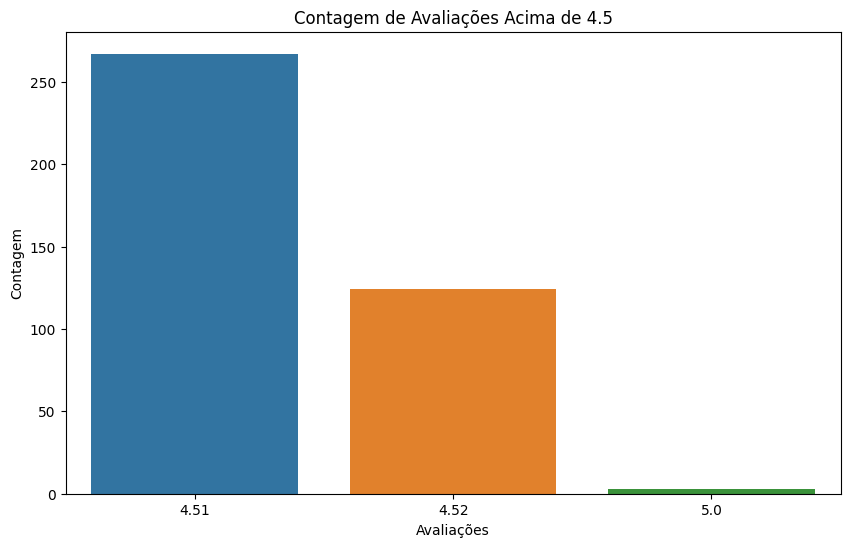

In [32]:
# Filtrar as avaliações com valores acima de 4.5
avaliacoes_acima_de_45 = dados[dados['rating'] > 4.5]

# Contar as avaliações acima de 4.5
contagem_avaliacoes = avaliacoes_acima_de_45['rating'].value_counts().sort_index()

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_avaliacoes.index, y=contagem_avaliacoes.values)
plt.xlabel('Avaliações')
plt.ylabel('Contagem')
plt.title('Contagem de Avaliações Acima de 4.5')
plt.show()

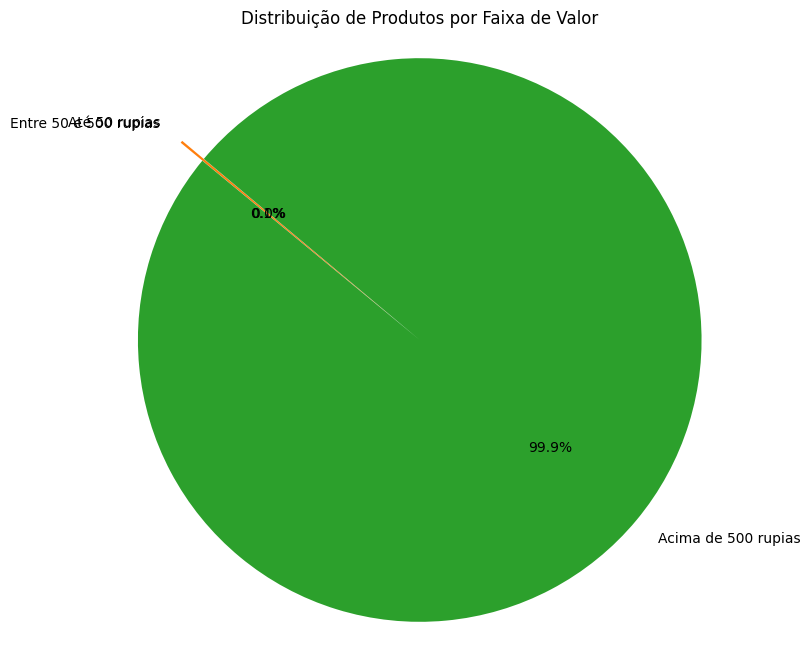

In [43]:
# Suponha que você já tenha carregado seus dados em um DataFrame chamado 'dados'

# Criar três DataFrames filtrando os valores nas faixas desejadas
faixa_ate_50 = dados[dados['actual_price'] <= 50]
faixa_50_500 = dados[(dados['actual_price'] > 50) & (dados['actual_price'] <= 500)]
faixa_acima_500 = dados[dados['actual_price'] > 500]

# Contar os produtos em cada faixa de valor
contagem_ate_50 = len(faixa_ate_50)
contagem_50_500 = len(faixa_50_500)
contagem_acima_500 = len(faixa_acima_500)

# Criar um dicionário com as contagens
contagens = [contagem_ate_50, contagem_50_500, contagem_acima_500]
faixas = ['Até 50 rupias', 'Entre 50 e 500 rupias',  'Acima de 500 rupias']
explode = (0, 0, 0.1)




# Criar um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagens, labels=faixas, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribuição de Produtos por Faixa de Valor')
plt.axis('equal')  # Assegura que o gráfico de pizza seja circular

# Mostrar o gráfico
plt.show()